**Name:** Alexia Ntantouri

**AEM:** 3871

In [ ]:
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid

from timeit import default_timer as timer

from keras.datasets import cifar10

import matplotlib.pyplot as plt

import pandas as pd

In [ ]:
# load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the values
X_train, X_test = X_train / 255.0, X_test / 255.0

print("X_train dimensions: " + str(X_train.shape))
print("y_train dimensions: " + str(y_train.shape) + "\n")

print("X_test dimensions: " + str(X_test.shape))
print("y_test dimensions: " + str(y_test.shape))

X_train dimensions: (50000, 32, 32, 3)
y_train dimensions: (50000, 1)

X_test dimensions: (10000, 32, 32, 3)
y_test dimensions: (10000, 1)


In [ ]:
# classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print("Classes: ", str(len(classes)), "\n")

for i in range(len(classes)):
  print(classes[i])

Classes:  10 

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


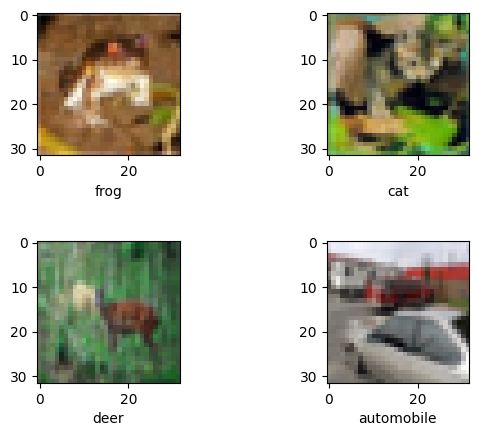

In [ ]:
# image samples

plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(2,2,1)
plt.imshow(X_train[0], cmap=plt.get_cmap('CMRmap'))
plt.xlabel(classes[y_train[0][0]])

plt.subplot(2,2,2)
plt.imshow(X_train[10254], cmap=plt.get_cmap('CMRmap'))
plt.xlabel(classes[y_train[10254][0]])

plt.subplot(2,2,3)
plt.imshow(X_train[20253], cmap=plt.get_cmap('CMRmap'))
plt.xlabel(classes[y_train[20253][0]])

plt.subplot(2,2,4)
plt.imshow(X_train[49999], cmap=plt.get_cmap('CMRmap'))
plt.xlabel(classes[y_train[49999][0]])

plt.show()

In [ ]:
# subsampling

train_size = 10000
test_size = 2000

# uncomment the lines below if you want to subsample the dataset

# X_train = X_train[:train_size]
# y_train = y_train[:train_size]

# X_test = X_test[:test_size]
# y_test = y_test[:test_size]

print("X_train= dimensions: " + str(X_train.shape))
print("y_train dimensions: " + str(y_train.shape) + "\n")

print("X_test dimensions: " + str(X_test.shape))
print("y_test dimensions: " + str(y_test.shape))

X_train= dimensions: (50000, 32, 32, 3)
y_train dimensions: (50000, 1)

X_test dimensions: (10000, 32, 32, 3)
y_test dimensions: (10000, 1)


In [ ]:
# reshape the data

# reshape the 4D array into a 2D array
# the first dimension (number of samples) should remain the same (50000)
# the -1 in the second dimension indicates that NumPy should automatically calculate
# the size of that dimension based on the total number of elements, maintaining the integrity of the data.
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

print("X_train dimensions: " + str(X_train.shape))
print("X_test dimensions: " + str(X_test.shape) + "\n")

X_train dimensions: (50000, 3072)
X_test dimensions: (10000, 3072)



In [ ]:
x_train_dataset = pd.DataFrame(X_train)

x_train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.407843,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.533333,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.309804,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.149020,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.305882,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725


# K-Nearest Neighbors

In [ ]:
# implementing knn algorithm from sklearn

print("sklearn KNN with 3 neighbors\n")

neigh = KNeighborsClassifier(n_neighbors=3)

start = timer()

neigh.fit(X_train, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

y_pred = neigh.predict(X_train)

end = timer()
print("Time: ", end - start) # time in seconds

accuracy = accuracy_score(y_train, y_pred)
print("Train accuracy:", accuracy, "\n")

print(classification_report(y_train, y_pred, target_names=classes))

sklearn KNN with 3 neighbors

Time:  495.7762776010002
Train accuracy: 0.57904 

              precision    recall  f1-score   support

    airplane       0.48      0.82      0.61      5000
  automobile       0.85      0.66      0.74      5000
        bird       0.39      0.74      0.51      5000
         cat       0.56      0.56      0.56      5000
        deer       0.46      0.68      0.55      5000
         dog       0.73      0.41      0.53      5000
        frog       0.74      0.49      0.59      5000
       horse       0.92      0.38      0.54      5000
        ship       0.65      0.76      0.70      5000
       truck       0.94      0.28      0.44      5000

    accuracy                           0.58     50000
   macro avg       0.67      0.58      0.58     50000
weighted avg       0.67      0.58      0.58     50000



In [ ]:
# implementing knn algorithm from sklearn

print("sklearn KNN with 1 neighbor\n")

neigh = KNeighborsClassifier(n_neighbors=1)

start = timer()

neigh.fit(X_train, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

y_pred = neigh.predict(X_test)

end = timer()
print("Time: ", end - start) # time in seconds

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy, "\n")

print(classification_report(y_test, y_pred, target_names=classes))

sklearn KNN with 1 neighbor

Time:  99.87860805700006
Test accuracy: 0.3539 

              precision    recall  f1-score   support

    airplane       0.42      0.48      0.45      1000
  automobile       0.65      0.22      0.33      1000
        bird       0.24      0.38      0.30      1000
         cat       0.29      0.24      0.26      1000
        deer       0.25      0.46      0.32      1000
         dog       0.36      0.29      0.32      1000
        frog       0.33      0.35      0.34      1000
       horse       0.56      0.29      0.39      1000
        ship       0.40      0.62      0.49      1000
       truck       0.61      0.20      0.30      1000

    accuracy                           0.35     10000
   macro avg       0.41      0.35      0.35     10000
weighted avg       0.41      0.35      0.35     10000



In [ ]:
# implementing knn algorithm from sklearn

print("sklearn KNN with 3 neighbors\n")

neigh = KNeighborsClassifier(n_neighbors=3)

start = timer()

neigh.fit(X_train, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

y_pred = neigh.predict(X_test)

end = timer()
print("Time: ", end - start) # time in seconds

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy, "\n")

print(classification_report(y_test, y_pred, target_names=classes))

sklearn KNN with 3 neighbors

Time:  99.06739222500028
Test accuracy: 0.3303 

              precision    recall  f1-score   support

    airplane       0.32      0.57      0.41      1000
  automobile       0.58      0.24      0.34      1000
        bird       0.20      0.45      0.28      1000
         cat       0.26      0.23      0.24      1000
        deer       0.25      0.44      0.32      1000
         dog       0.43      0.21      0.28      1000
        frog       0.36      0.23      0.28      1000
       horse       0.73      0.20      0.31      1000
        ship       0.44      0.61      0.51      1000
       truck       0.73      0.12      0.21      1000

    accuracy                           0.33     10000
   macro avg       0.43      0.33      0.32     10000
weighted avg       0.43      0.33      0.32     10000



In [ ]:
def myKNN_predictions(X_train, y_train, X_test, k_neighbors):
  # compute the distances
  # each row has the euclidean distances of one sample from the test set to
  # all the samples from the training set
  distances = euclidean_distances(X_test, X_train)

  # sort the distances of each row and retrieve first k indices
  # these indices refer to the k nearest neighbors for each sample of the test set
  indices = np.argsort(distances, axis=1)[:, :k_neighbors]

  # replace indices with labels
  for i in range(len(X_test)):
    for j in range(k_neighbors):
      indices[i][j] = y_train[indices[i][j]]

  # get the label with the most votes for each sample of the test set
  predictions = np.array([np.bincount(row).argmax() for row in indices])

  # return predictions
  return predictions

In [ ]:
print("my KKN with 1 neighbor\n")

start = timer()

my_predictions = myKNN_predictions(X_train, y_train, X_test, 1)

end = timer()

print("Time: ", end - start) # time in seconds

accuracy = accuracy_score(y_test, my_predictions)
print("Test accuracy:", accuracy, "\n")

print(classification_report(y_test, my_predictions, target_names=classes))

my KKN with 1 neighbor

Time:  142.8339012399997
Test accuracy: 0.3539 

              precision    recall  f1-score   support

    airplane       0.42      0.48      0.45      1000
  automobile       0.65      0.22      0.33      1000
        bird       0.24      0.38      0.30      1000
         cat       0.29      0.24      0.26      1000
        deer       0.25      0.46      0.32      1000
         dog       0.36      0.29      0.32      1000
        frog       0.33      0.35      0.34      1000
       horse       0.56      0.29      0.39      1000
        ship       0.40      0.62      0.49      1000
       truck       0.61      0.20      0.30      1000

    accuracy                           0.35     10000
   macro avg       0.41      0.35      0.35     10000
weighted avg       0.41      0.35      0.35     10000



In [ ]:
print("my KKN with 3 neighbors\n")

start = timer()

my_predictions = myKNN_predictions(X_train, y_train, X_test, 3)

end = timer()

print("Time: ", end - start) # time in seconds

accuracy = accuracy_score(y_test, my_predictions)
print("Test accuracy:", accuracy, "\n")

print(classification_report(y_test, my_predictions, target_names=classes))

my KKN with 3 neighbors

Time:  141.62636448600006
Test accuracy: 0.3303 

              precision    recall  f1-score   support

    airplane       0.32      0.57      0.41      1000
  automobile       0.58      0.24      0.34      1000
        bird       0.20      0.45      0.28      1000
         cat       0.26      0.23      0.24      1000
        deer       0.25      0.44      0.32      1000
         dog       0.43      0.21      0.28      1000
        frog       0.36      0.23      0.28      1000
       horse       0.73      0.20      0.31      1000
        ship       0.44      0.61      0.51      1000
       truck       0.73      0.12      0.21      1000

    accuracy                           0.33     10000
   macro avg       0.43      0.33      0.32     10000
weighted avg       0.43      0.33      0.32     10000



# Nearest Centroid Classifier

In [ ]:
clf = NearestCentroid()

print("sklearn NCC \n")

start = timer()

clf.fit(X_train, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

y_pred = clf.predict(X_train)

end = timer()
print("Time: ", end - start) # time in seconds

accuracy = accuracy_score(y_train, y_pred)
print("Train accuracy:", accuracy, "\n")

print(classification_report(y_train, y_pred, target_names=classes))

sklearn NCC 

Time:  1.2732797899998332
Train accuracy: 0.26968 

              precision    recall  f1-score   support

    airplane       0.26      0.50      0.34      5000
  automobile       0.28      0.18      0.22      5000
        bird       0.28      0.10      0.15      5000
         cat       0.24      0.05      0.08      5000
        deer       0.27      0.13      0.18      5000
         dog       0.27      0.30      0.28      5000
        frog       0.21      0.53      0.30      5000
       horse       0.26      0.16      0.20      5000
        ship       0.40      0.34      0.36      5000
       truck       0.33      0.41      0.36      5000

    accuracy                           0.27     50000
   macro avg       0.28      0.27      0.25     50000
weighted avg       0.28      0.27      0.25     50000



In [ ]:
clf = NearestCentroid()

print("sklearn NCC \n")

start = timer()

clf.fit(X_train, y_train.ravel()) # ravel() will convert that array shape from (n,1) to (n, ) (i.e. flatten it)

y_pred = clf.predict(X_test)

end = timer()
print("Time: ", end - start) # time in seconds

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy, "\n")

print(classification_report(y_test, y_pred, target_names=classes))


sklearn NCC 

Time:  0.7325081630001478
Test accuracy: 0.2774 

              precision    recall  f1-score   support

    airplane       0.27      0.54      0.36      1000
  automobile       0.28      0.19      0.22      1000
        bird       0.28      0.11      0.16      1000
         cat       0.27      0.06      0.09      1000
        deer       0.28      0.12      0.17      1000
         dog       0.27      0.29      0.28      1000
        frog       0.22      0.54      0.31      1000
       horse       0.27      0.17      0.20      1000
        ship       0.42      0.37      0.39      1000
       truck       0.33      0.41      0.36      1000

    accuracy                           0.28     10000
   macro avg       0.29      0.28      0.25     10000
weighted avg       0.29      0.28      0.25     10000



In [ ]:
def calculate_centroids(X_train, y_train):
  count = np.zeros(10)
  centroids = np.array([ [0.0]*len(X_train[0]) for i in range(10)])

  for i in range(len(y_train)):
    centroids[y_train[i]] += X_train[i]
    count[y_train[i]] += 1

  for i in range(10):
    centroids[i] /= count[i]

  return centroids

def myNCC_predictions(X_train, y_train, X_test):
  # calculate centroids
  centroids = calculate_centroids(X_train, y_train)

  # calculate the distances
  # each row has the euclidean distances of one sample
  # from the test set to all the centroids
  distances = euclidean_distances(X_test, centroids)

  # find the index of minimum distance of each row
  # the index refers to the nearest centroid for each sample of the test set
  # predictions = np.argsort(distances, axis=1)[:, :1]
  predictions = np.argmin(distances, axis=1)

  return predictions

In [ ]:
print("my NCC \n")

start = timer()

my_predictions = myNCC_predictions(X_train, y_train, X_train)

end = timer()
print("Time: ", end - start) # time in seconds

accuracy = accuracy_score(y_train, my_predictions)
print("Train accuracy:", accuracy, "\n")

print(classification_report(y_train, my_predictions, target_names=classes))

my NCC 

Time:  1.565578163000282
Train accuracy: 0.26968 

              precision    recall  f1-score   support

    airplane       0.26      0.50      0.34      5000
  automobile       0.28      0.18      0.22      5000
        bird       0.28      0.10      0.15      5000
         cat       0.24      0.05      0.08      5000
        deer       0.27      0.13      0.18      5000
         dog       0.27      0.30      0.28      5000
        frog       0.21      0.53      0.30      5000
       horse       0.26      0.16      0.20      5000
        ship       0.40      0.34      0.36      5000
       truck       0.33      0.41      0.36      5000

    accuracy                           0.27     50000
   macro avg       0.28      0.27      0.25     50000
weighted avg       0.28      0.27      0.25     50000



In [ ]:
print("my NCC \n")

start = timer()

my_predictions = myNCC_predictions(X_train, y_train, X_test)

end = timer()
print("Time: ", end - start) # time in seconds

accuracy = accuracy_score(y_test, my_predictions)
print("Test accuracy:", accuracy, "\n")

print(classification_report(y_test, my_predictions, target_names=classes))

my NCC 

Time:  0.9604025179996825
Test accuracy: 0.2774 

              precision    recall  f1-score   support

    airplane       0.27      0.54      0.36      1000
  automobile       0.28      0.19      0.22      1000
        bird       0.28      0.11      0.16      1000
         cat       0.27      0.06      0.09      1000
        deer       0.28      0.12      0.17      1000
         dog       0.27      0.29      0.28      1000
        frog       0.22      0.54      0.31      1000
       horse       0.27      0.17      0.20      1000
        ship       0.42      0.37      0.39      1000
       truck       0.33      0.41      0.36      1000

    accuracy                           0.28     10000
   macro avg       0.29      0.28      0.25     10000
weighted avg       0.29      0.28      0.25     10000



In [ ]:
# print predictions

print("For the first 10 predictions:")
for i in range(10):
  if y_test[i][0] == y_pred[i]:
    pred = "(Correct)"
  else:
    pred = "(False)"
  print("The correct class was: ", str(y_test[i]), " and it was classified as: ", str(y_pred[i]), " ", pred)

For the first 10 predictions:
The correct class was:  [3]  and it was classified as:  6   (False)
The correct class was:  [8]  and it was classified as:  8   (Correct)
The correct class was:  [8]  and it was classified as:  8   (Correct)
The correct class was:  [0]  and it was classified as:  8   (False)
The correct class was:  [6]  and it was classified as:  5   (False)
The correct class was:  [6]  and it was classified as:  6   (Correct)
The correct class was:  [1]  and it was classified as:  6   (False)
The correct class was:  [6]  and it was classified as:  6   (Correct)
The correct class was:  [3]  and it was classified as:  0   (False)
The correct class was:  [1]  and it was classified as:  8   (False)


# **Results**

For the **test set:**

**KNN with 1 neighbor:** **35.39%** accuracy and **~120** sec time

**KNN with 3 neighbors:** **33.03%** accuracy and **~120** sec time

**NCC:** **27.74%** accuracy and **~1.1** sec time